In [9]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
X, y = df.drop("species", axis=1), df["species"]
print(X.shape, y.shape)
print(y.unique())

(150, 4) (150,)
['setosa' 'versicolor' 'virginica']


In [19]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [20]:
encoder = LabelBinarizer()
y = encoder.fit_transform(y)
print(y[:5])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
def create_model():
    model = Sequential()
    model.add(Dense(4, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=3, monitor="val_loss")
history = model.fit(scaled_X_train, y_train, epochs=500, validation_data=(scaled_X_test, y_test), callbacks=[early_stopping])

Epoch 1/500
4/4 [==============================] - 1s 82ms/step - loss: 1.1012 - accuracy: 0.2333 - val_loss: 1.1283 - val_accuracy: 0.2000
Epoch 2/500
4/4 [==============================] - 0s 13ms/step - loss: 1.0981 - accuracy: 0.2500 - val_loss: 1.1259 - val_accuracy: 0.2000
Epoch 3/500
4/4 [==============================] - 0s 14ms/step - loss: 1.0953 - accuracy: 0.2500 - val_loss: 1.1233 - val_accuracy: 0.2000
Epoch 4/500
4/4 [==============================] - 0s 12ms/step - loss: 1.0926 - accuracy: 0.2750 - val_loss: 1.1209 - val_accuracy: 0.2000
Epoch 5/500
4/4 [==============================] - 0s 14ms/step - loss: 1.0898 - accuracy: 0.2833 - val_loss: 1.1184 - val_accuracy: 0.2000
Epoch 6/500
4/4 [==============================] - 0s 14ms/step - loss: 1.0873 - accuracy: 0.3000 - val_loss: 1.1162 - val_accuracy: 0.2000
Epoch 7/500
4/4 [==============================] - 0s 13ms/step - loss: 1.0845 - accuracy: 0.3000 - val_loss: 1.1138 - val_accuracy: 0.2000
Epoch 8/500
4/4 [===

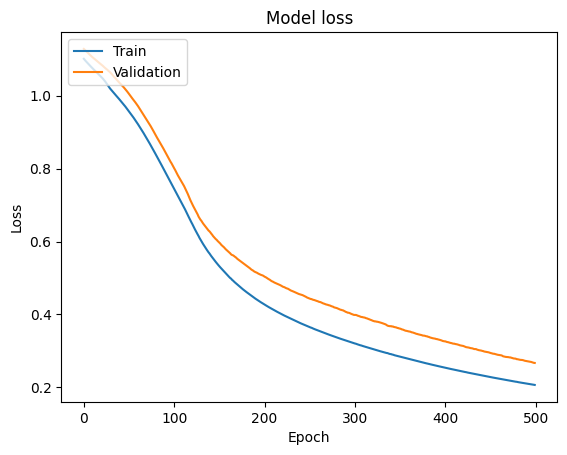

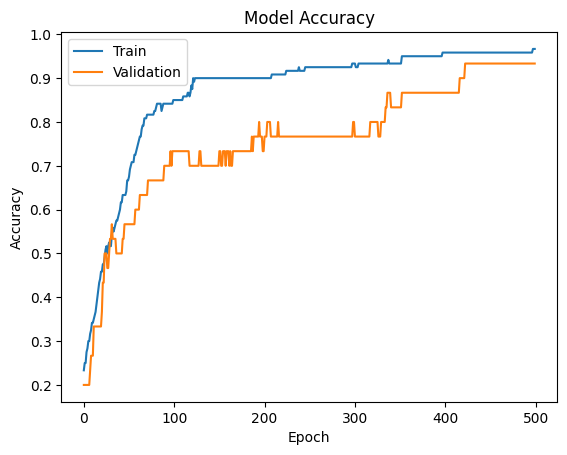

In [37]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


En Prod on doit procéder à l'entraînement du modèle sur l'ensemble des données disponibles.

In [41]:
epochs = len(history.history["loss"])
scaled_X = scaler.fit_transform(X)
model = create_model()
model.fit(scaled_X, y, epochs=epochs)

Epoch 1/500
5/5 [==============================] - 1s 3ms/step - loss: 1.1107 - accuracy: 0.2200
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1024 - accuracy: 0.2733
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 1.0942 - accuracy: 0.3333
Epoch 4/500
5/5 [==============================] - 0s 4ms/step - loss: 1.0862 - accuracy: 0.3333
Epoch 5/500
5/5 [==============================] - 0s 4ms/step - loss: 1.0781 - accuracy: 0.3333
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 1.0699 - accuracy: 0.3333
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 1.0618 - accuracy: 0.3333
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 1.0538 - accuracy: 0.3333
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 1.0460 - accuracy: 0.3333
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 1.0380 - accuracy: 0.3333
Epoch 11/500
5/5 [===========

In [44]:
model.save("iris_model.keras")

On doit également sauvegarder le scaler pour pouvoir le réutiliser lors de la prédiction.

In [5]:
import joblib

In [45]:
joblib.dump(scaler, "iris_scaler.pkl")

['iris_scaler.pkl']

Simulation d'un test de prédiction sur un nouveau client.

In [6]:
from tensorflow.keras.models import load_model

flower_model = load_model("iris_model.keras")
flower_scaler = joblib.load("iris_scaler.pkl")
flower_example = {"sepal_length": 5.1, "sepal_width": 3.5, "petal_length": 1.4, "petal_width": 0.2}


In [22]:
def return_prediction(model, scaler, sample_json):
    s_len = sample_json["sepal_length"]
    s_width = sample_json["sepal_width"]
    p_len = sample_json["petal_length"]
    p_width = sample_json["petal_width"]

    flower = [[s_len, s_width, p_len, p_width]]
    flower = scaler.transform(flower)

    classes = np.array(["setosa", "versicolor", "virginica"])
    
    prediction = model.predict(flower)[0]
    class_ind = int(np.argmax(prediction))
    percent = round(prediction[class_ind], 2)
    return {"class": classes[class_ind], "percent": percent}

In [23]:
return_prediction(flower_model, flower_scaler, flower_example)

1/1 [==============================] - 0s 36ms/step


c:\Users\hajdaini\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


{'class': 'setosa', 'percent': 0.97}

Code final à mettre en production:

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib


model = load_model("iris_model.keras")
scaler = joblib.load("iris_scaler.pkl")

def predict_flower(sample_json):
    """
    Cette fonction prend en entrée un modèle, un scaler et un dictionnaire contenant les caractéristiques d'une fleur à prédire.
    Elle retourne la prédiction du modèle pour la fleur donnée.

    Paramètres :
    - model : Le modèle utilisé pour effectuer la prédiction.
    - scaler : Le scaler utilisé pour normaliser les données.
    - sample_json : Un dictionnaire contenant les caractéristiques de la fleur à prédire.

    Retour :
    - La prédiction du modèle pour la fleur donnée.
    """
    
    s_len = sample_json["sepal_length"]
    s_width = sample_json["sepal_width"]
    p_len = sample_json["petal_length"]
    p_width = sample_json["petal_width"]

    flower = [[s_len, s_width, p_len, p_width]]
    flower = scaler.transform(flower)

    classes = np.array(["setosa", "versicolor", "virginica"])
    prediction = model.predict(flower)[0]
    class_ind = int(np.argmax(prediction))
    percent = round(prediction[class_ind], 2)
    return {"class": classes[class_ind], "percent": percent}